# Supplier Selection Methods - Using the `mcdm_functions` Module
Prepared by: Nickolas K. Freeman, Ph.D.

The purpose of this notebook is to demontsrate how you may define custom files that can be imported as modules in Python. In particular, a Python file named *mcdm_functions.py* was created and is included in this GitHub repository. The file includes several functions for performing multi-criteria decision analyis (MCDA) using the weighted sum, weighted product, and TOPSIS methods. If you download and open the *mcdm_functions.py* file, or simply view it on GitHub, you will see that it is comprised of many functions that are developed in the notebooks looking at each of the stated MCDA techniques. In this notebook, we will explore several of the functions included in the file.

First, as always, we import the libraries that we will be using throughout this analysis. **Note that we are importing a module named `mcdm_functions`. This *module* is our .py file. By 'importing' the module, we are able to access all of the functions defined within the .py file in the same way that we access functions from other modules such as `pandas` and `numpy`.** 

In [1]:
import pandas as pd

import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

import mcdm_functions as mcfunc

The functions in the `mcdm_functions` module include `docstrings` that are enclosed in triple quotes, i.e., '''docstrings in the *mcdm_functions.py* file are indicated like this'''. These docstrings provide information regarding the functions that is accessible to users of the module. For example, the following code block shows how Python's `help` function may be used to get information regarding the `Normalize_Weights` function. This information is also available by using `shift + tab` within the parentheses of a valid function call.

In [2]:
help(mcfunc.Normalize_Weights)

Help on function Normalize_Weights in module mcdm_functions:

Normalize_Weights(weights_array, norm_type='divide_by_sum')
    Normalizes a provided weight array so that the sum equals 1
    
    Parameters
    ----------
    weights_array : a numpy array containing the raw weights
    
    norm_type : a string specifying the type of normalization to perform
        - 'divide_by_max' divides all values by the maximum value
        - 'divide_by_sum' divides all values by the sum of the values
    
    Yields
    ------
    temp_weights_array: a copy of the passed weights array with the normalizations performed
    
    Examples
    --------
    >>> import numpy as np
    >>> import mcdm_functions as mcfunc
    >>> criteria_weights = np.array([2,4,6,7,9])
    >>> temp = mcfunc.Normalize_Weights(criteria_weights,'divide_by_max')
    >>> print(temp)
    
        [ 0.22222222  0.44444444  0.66666667  0.77777778  1.        ]



In this notebook, we will use a small dataset that ranks a set of 8 products on 6 criteria. In lieu of importing the dataset, the following code block explicitly defines and stores the dataset in a `pandas` dataframe.

In [3]:
data_dict = {'Product': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
             'Product Advantage': [13.1,13.2,12.2,13.2,11.3,12.6,9.8,9.6],
             'Strategic Alignment': [9.8,8.2,10.0,9.6,9.9,7.7,6.6,5.3],
             'Technical Feasibility': [20.0,18.7,18.5,17.1,16.1,17.4,14.0,12.9],
             'Market Attractiveness': [15.5,12.3,13.1,13.1,12.9,11.7,8.0,7.6],
             'Return': [10.8,9.6,9.9,9.6,9.0,9.7,7.2,6.0],
             'Risk': [15.0,15.0,13.8,14.1,15.6,12.6,10.8,11.4]}

score_data = pd.DataFrame(data_dict)
score_data = score_data.set_index('Product')
score_data = score_data.reset_index()
score_data

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility
0,A,15.5,13.1,10.8,15.0,9.8,20.0
1,B,12.3,13.2,9.6,15.0,8.2,18.7
2,C,13.1,12.2,9.9,13.8,10.0,18.5
3,D,13.1,13.2,9.6,14.1,9.6,17.1
4,E,12.9,11.3,9.0,15.6,9.9,16.1
5,F,11.7,12.6,9.7,12.6,7.7,17.4
6,G,8.0,9.8,7.2,10.8,6.6,14.0
7,H,7.6,9.6,6.0,11.4,5.3,12.9


The first thing that should be noted in our data is that many of the scores in the various column appear to be scaled differently. The `mcdm_functions` module includes a function named `Normalize_Column_Scores` that provides several methods for *normalizing* scores that are stored in columns of a pandas dataframe. The following code blocks apply several of the normalization methods to the *Market Attractiveness* column for the purpose of demonstration. Specifically, we can divide all of the scores in a column by the largest score in the column ...

In [4]:
columns = ['Market Attractiveness']
mcfunc.Normalize_Column_Scores(score_data, columns, 'divide_by_max')

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility
0,A,1.000000,13.1,10.8,15.0,9.8,20.0
1,B,0.793548,13.2,9.6,15.0,8.2,18.7
2,C,0.845161,12.2,9.9,13.8,10.0,18.5
3,D,0.845161,13.2,9.6,14.1,9.6,17.1
4,E,0.832258,11.3,9.0,15.6,9.9,16.1
5,F,0.754839,12.6,9.7,12.6,7.7,17.4
6,G,0.516129,9.8,7.2,10.8,6.6,14.0
7,H,0.490323,9.6,6.0,11.4,5.3,12.9


... we can divide all of the scores in a column by the difference between the largest and smallest score in the column ...

In [5]:
columns = ['Market Attractiveness']
mcfunc.Normalize_Column_Scores(score_data, columns, 'range_norm')

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility
0,A,1.000000,13.1,10.8,15.0,9.8,20.0
1,B,0.594937,13.2,9.6,15.0,8.2,18.7
2,C,0.696203,12.2,9.9,13.8,10.0,18.5
3,D,0.696203,13.2,9.6,14.1,9.6,17.1
4,E,0.670886,11.3,9.0,15.6,9.9,16.1
5,F,0.518987,12.6,9.7,12.6,7.7,17.4
6,G,0.050633,9.8,7.2,10.8,6.6,14.0
7,H,0.000000,9.6,6.0,11.4,5.3,12.9


... we can compute the mean and standard deviation for scores in a column, and use them to transform each value into a $Z$-score (assumes the scores are normally distributed around the mean value) ...

In [6]:
columns = ['Market Attractiveness']
mcfunc.Normalize_Column_Scores(score_data, columns, 'z_norm')

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility
0,A,1.385274,13.1,10.8,15.0,9.8,20.0
1,B,0.195240,13.2,9.6,15.0,8.2,18.7
2,C,0.492748,12.2,9.9,13.8,10.0,18.5
3,D,0.492748,13.2,9.6,14.1,9.6,17.1
4,E,0.418371,11.3,9.0,15.6,9.9,16.1
5,F,-0.027891,12.6,9.7,12.6,7.7,17.4
6,G,-1.403868,9.8,7.2,10.8,6.6,14.0
7,H,-1.552623,9.6,6.0,11.4,5.3,12.9


... we can divide each score in a column by the sum of the scores in the column ...

In [7]:
columns = ['Market Attractiveness']
mcfunc.Normalize_Column_Scores(score_data, columns, 'divide_by_sum')

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility
0,A,0.164544,13.1,10.8,15.0,9.8,20.0
1,B,0.130573,13.2,9.6,15.0,8.2,18.7
2,C,0.139066,12.2,9.9,13.8,10.0,18.5
3,D,0.139066,13.2,9.6,14.1,9.6,17.1
4,E,0.136943,11.3,9.0,15.6,9.9,16.1
5,F,0.124204,12.6,9.7,12.6,7.7,17.4
6,G,0.084926,9.8,7.2,10.8,6.6,14.0
7,H,0.080679,9.6,6.0,11.4,5.3,12.9


... and we can divide each score by the $L2$-norm calculated from all of the scores in the column. This is called *vector* normalization. Specifically, if there are $J$ scores in a column, the *vector norm* for a score $j\in J$ is computed as:

$$\displaystyle \hat{s}_{j} = \frac{s_{j}}{\sqrt{\sum_{i= 1}^{J}s_{i}^{2}}},$$

where $s_{j}$ denotes the unnormalized $j^{th}$ score and $\hat{s}_{j}$ denotes the $j^{th}$ score after vector normalization is applied. **Note in the following code block that the normalization can be applied to multiple columns using a single function call.**

In [8]:
columns = ['Market Attractiveness','Product Advantage']
mcfunc.Normalize_Column_Scores(score_data, columns, 'vector')

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility
0,A,0.455131,0.387381,10.8,15.0,9.8,20.0
1,B,0.361168,0.390338,9.6,15.0,8.2,18.7
2,C,0.384659,0.360767,9.9,13.8,10.0,18.5
3,D,0.384659,0.390338,9.6,14.1,9.6,17.1
4,E,0.378786,0.334153,9.0,15.6,9.9,16.1
5,F,0.343550,0.372595,9.7,12.6,7.7,17.4
6,G,0.234906,0.289796,7.2,10.8,6.6,14.0
7,H,0.223161,0.283882,6.0,11.4,5.3,12.9


Before continuing, it is important to note that the functions in the `mcdm_functions` module **do not overwrite** the contents of the dataframe that is passed as an argument. In contrast, the functions return a modified dataframe that may be used to overwrite the original dataframe.

For completeness, the `mcdm_functions` module provides two methods to normalize a weights array. This is demonstrated in the following code block.

In [9]:
weights = np.array([1,1,2])
print('The original weights array is: {}'.format(weights))

updated_weights = mcfunc.Normalize_Weights(weights,norm_type='divide_by_sum')
print('\nDividing each weight in the array by the sum of the weights yields: {}'.format(updated_weights))

updated_weights = mcfunc.Normalize_Weights(weights,norm_type='divide_by_max')
print('\nDividing each weight in the array by the maximum weight in the array yields: {}'.format(updated_weights))

The original weights array is: [1 1 2]

Dividing each weight in the array by the sum of the weights yields: [ 0.25  0.25  0.5 ]

Dividing each weight in the array by the maximum weight in the array yields: [ 0.5  0.5  1. ]


As noted previosuly, the two methods are provided for convenience. However, it is worth noting that the two methods are actually equivalent. In particular, if we consider the ratio of any two weights $w_{j}$ and $w_{k}$, i.e., $\frac{w_{j}}{w_{k}}$, the value will always be the same for both methods. Essentially, when we do the weight normalization in either case we are dividing the orignal weight by a constant, e.g., $w_{j} = \frac{\tilde{w}_{j}}{c}$ and $w_{k} = \frac{\tilde{w}_{k}}{c}$. Thus, $\frac{w_{j}}{w_{k}} \equiv \frac{\tilde{w}_{j}}{c}\left(\frac{c}{\tilde{w}_{k}}\right) \equiv \frac{\tilde{w}_{j}}{\tilde{w}_{k}}$.

Aside from normalization of scores and weights, another thing that needs to be considered is whether or not all of the scores indicate the same thing. In particular, are higher values always better, are lower values always better, or is there a mix? The following code block reprints our original dataframe, where it can be seen that there is a *Risk* score. Let's assume that this score actually denotes the amount of risk that is associated with a product endeavor, which would make the associated scores a *lower is better* format. 

In [10]:
score_data

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility
0,A,15.5,13.1,10.8,15.0,9.8,20.0
1,B,12.3,13.2,9.6,15.0,8.2,18.7
2,C,13.1,12.2,9.9,13.8,10.0,18.5
3,D,13.1,13.2,9.6,14.1,9.6,17.1
4,E,12.9,11.3,9.0,15.6,9.9,16.1
5,F,11.7,12.6,9.7,12.6,7.7,17.4
6,G,8.0,9.8,7.2,10.8,6.6,14.0
7,H,7.6,9.6,6.0,11.4,5.3,12.9


All of the ranking methods included in the `mcdm_functions` module assume that all scores are given in a *higher is better* format. Thus, module includes a function named `Convert_Higher_is_Better` that provides two methods for transforming scores given in a *lower is better* format to a *higher is better* format. First, we can use an *absolute* conversion that captures the difference between each score and the worst (i.e., highest) score.

In [11]:
mcfunc.Convert_Higher_is_Better(score_data,['Risk'],'absolute')

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility,Risk (absolute HIB)
0,A,15.5,13.1,10.8,15.0,9.8,20.0,0.6
1,B,12.3,13.2,9.6,15.0,8.2,18.7,0.6
2,C,13.1,12.2,9.9,13.8,10.0,18.5,1.8
3,D,13.1,13.2,9.6,14.1,9.6,17.1,1.5
4,E,12.9,11.3,9.0,15.6,9.9,16.1,0.0
5,F,11.7,12.6,9.7,12.6,7.7,17.4,3.0
6,G,8.0,9.8,7.2,10.8,6.6,14.0,4.8
7,H,7.6,9.6,6.0,11.4,5.3,12.9,4.2


On the other hand, we can use a relative conversion that measures where each score falls within the range between the *best* and *worst* values.

In [12]:
mcfunc.Convert_Higher_is_Better(score_data,['Risk'],'relative')

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility,Risk (relative HIB)
0,A,15.5,13.1,10.8,15.0,9.8,20.0,0.1250
1,B,12.3,13.2,9.6,15.0,8.2,18.7,0.1250
2,C,13.1,12.2,9.9,13.8,10.0,18.5,0.3750
3,D,13.1,13.2,9.6,14.1,9.6,17.1,0.3125
4,E,12.9,11.3,9.0,15.6,9.9,16.1,0.0000
5,F,11.7,12.6,9.7,12.6,7.7,17.4,0.6250
6,G,8.0,9.8,7.2,10.8,6.6,14.0,1.0000
7,H,7.6,9.6,6.0,11.4,5.3,12.9,0.8750


**Note that the converted scores calculated by the `Convert_Higher_is_Better` function do not overwrite the original score values. Instead, a new column is created that contains the converted score. This new column include the original column name with the text *(absolute HIB)* or *(relative HIB)* appended to the end of the name to indicate the transformation that has been applied.**

We will now discuss the various ranking capabilities given by the `mcdm_functions` module. First, the following code block uses the previously described function to create a copy of our data with column normalizations and transformations applied. We also define a weights array that (for simplicity) weights all criteria equally.

In [13]:
temp = mcfunc.Convert_Higher_is_Better(score_data,['Risk'],'relative')

column_list = ['Market Attractiveness',
               'Product Advantage',
               'Return',
               'Strategic Alignment',
               'Technical Feasibility']

temp = mcfunc.Normalize_Column_Scores(temp, column_list, 'divide_by_max')

criteria_list = ['Market Attractiveness',
                 'Product Advantage',
                 'Return',
                 'Strategic Alignment',
                 'Technical Feasibility',
                 'Risk (relative HIB)']

criteria_weights = np.array([1,1,1,1,1,1])

criteria_weights = mcfunc.Normalize_Weights(criteria_weights, norm_type='divide_by_sum')

temp

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility,Risk (relative HIB)
0,A,1.000000,0.992424,1.000000,15.0,0.98,1.000,0.1250
1,B,0.793548,1.000000,0.888889,15.0,0.82,0.935,0.1250
2,C,0.845161,0.924242,0.916667,13.8,1.00,0.925,0.3750
3,D,0.845161,1.000000,0.888889,14.1,0.96,0.855,0.3125
4,E,0.832258,0.856061,0.833333,15.6,0.99,0.805,0.0000
5,F,0.754839,0.954545,0.898148,12.6,0.77,0.870,0.6250
6,G,0.516129,0.742424,0.666667,10.8,0.66,0.700,1.0000
7,H,0.490323,0.727273,0.555556,11.4,0.53,0.645,0.8750


The following code block uses the *weighted sum* method to rank the product alternatives.

In [14]:
mcfunc.Compute_Weighted_Sum_Score(temp,criteria_list,criteria_weights)

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility,Risk (relative HIB),Weighted Score (Sum)
0,A,1.000000,0.992424,1.000000,15.0,0.98,1.000,0.1250,0.849571
2,C,0.845161,0.924242,0.916667,13.8,1.00,0.925,0.3750,0.831012
5,F,0.754839,0.954545,0.898148,12.6,0.77,0.870,0.6250,0.812089
3,D,0.845161,1.000000,0.888889,14.1,0.96,0.855,0.3125,0.810258
1,B,0.793548,1.000000,0.888889,15.0,0.82,0.935,0.1250,0.760406
4,E,0.832258,0.856061,0.833333,15.6,0.99,0.805,0.0000,0.719442
6,G,0.516129,0.742424,0.666667,10.8,0.66,0.700,1.0000,0.714203
7,H,0.490323,0.727273,0.555556,11.4,0.53,0.645,0.8750,0.637192


The following code block uses the *weighted product* method to rank the product alternatives.

In [15]:
mcfunc.Compute_Weighted_Product_Score(temp,criteria_list,criteria_weights)

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility,Risk (relative HIB),Weighted Score (Product)
5,F,0.754839,0.954545,0.898148,12.6,0.77,0.870,0.6250,0.804417
2,C,0.845161,0.924242,0.916667,13.8,1.00,0.925,0.3750,0.792839
3,D,0.845161,1.000000,0.888889,14.1,0.96,0.855,0.3125,0.759998
0,A,1.000000,0.992424,1.000000,15.0,0.98,1.000,0.1250,0.703837
6,G,0.516129,0.742424,0.666667,10.8,0.66,0.700,1.0000,0.700369
1,B,0.793548,1.000000,0.888889,15.0,0.82,0.935,0.1250,0.638253
7,H,0.490323,0.727273,0.555556,11.4,0.53,0.645,0.8750,0.624394
4,E,0.832258,0.856061,0.833333,15.6,0.99,0.805,0.0000,0.000000


The following code block uses the *TOPSIS* method to rank the product alternatives.

In [16]:
mcfunc.Compute_TOPSIS_Score(temp,criteria_list,criteria_weights)

,Product,Market Attractiveness,Product Advantage,Return,Risk,Strategic Alignment,Technical Feasibility,Risk (relative HIB),TOPSIS Score
5,F,0.754839,0.954545,0.898148,12.6,0.77,0.870,0.6250,0.617558
2,C,0.845161,0.924242,0.916667,13.8,1.00,0.925,0.3750,0.565790
6,G,0.516129,0.742424,0.666667,10.8,0.66,0.700,1.0000,0.564048
3,D,0.845161,1.000000,0.888889,14.1,0.96,0.855,0.3125,0.522801
0,A,1.000000,0.992424,1.000000,15.0,0.98,1.000,0.1250,0.516147
7,H,0.490323,0.727273,0.555556,11.4,0.53,0.645,0.8750,0.480601
1,B,0.793548,1.000000,0.888889,15.0,0.82,0.935,0.1250,0.423148
4,E,0.832258,0.856061,0.833333,15.6,0.99,0.805,0.0000,0.387947


As can be seen by the previous examples, the various weighting techniques suggest different rankings, even though the input data and weights are the same. These *conflicting rankings* can make it difficult to narrow down the full list of alternatives to a smaller subset. The `mcdm_functions` module provides a `Robust_Ranking` function that looks at how the rankings for the various methods vary as the input weight array varies within a user-defined range of the mean weight value. The following code block demonstrates the use of the `Robust_Ranking` function for the weighted sum ranking method.

In [17]:
mcfunc.Robust_Ranking(temp,
                      criteria_list,
                      100,
                      criteria_weights,
                      'Product',
                      perturbation_range=0.10,
                      score_type='weighted_sum',
                      top_values=3)

,Product,Weighted Sum Count,Weighted Sum Proportion
0,A,100,1.00
1,C,100,1.00
3,F,62,0.62
2,D,38,0.38


The following code block demonstrates the use of the `Robust_Ranking` function for the TOPSIS ranking method, and demonstrate the *include_plot* functionality.

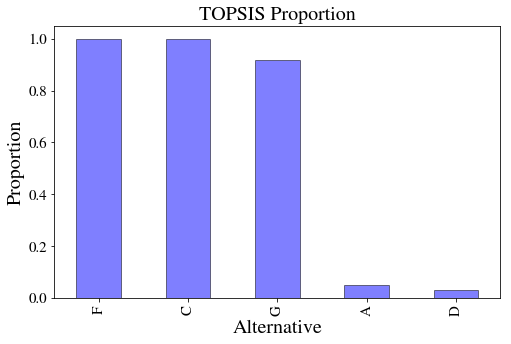

,Product,TOPSIS Count,TOPSIS Proportion
0,F,100,1.00
1,C,100,1.00
2,G,92,0.92
3,A,5,0.05
4,D,3,0.03


In [18]:
mcfunc.Robust_Ranking(temp,
                      criteria_list,
                      100,
                      criteria_weights,
                      'Product',
                      perturbation_range=0.10,
                      score_type='topsis',
                      top_values=3,
                      include_plot = True)